**Experiment 12**

Using CNN for Image ClassificatioN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Flatten, Dense
from keras.datasets import cifar10

Loading Cifar-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using ImageDataGenerator for Real-time data augmentation

In [ ]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range = 30, rescale = 1./255)
train_gen = img_gen.flow(x_train, y_train, batch_size = 32)
test_gen = img_gen.flow(x_test, y_test)

Building a CNN Model for Image Classification

In [ ]:
from keras.layers import Input

In [ ]:

model = models.Sequential()
model.add(Input(shape =(32,32,3)))
model.add(Conv2D(filters = 32,input_shape = (3,3),kernel_size = 1))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,input_shape = (3,3),kernel_size = 1))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128,input_shape = (3,3),kernel_size = 1))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 256,input_shape = (3,3),kernel_size = 1))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))


# Todo
#Your input is of  32 x 32 x 3 dimensions



In [ ]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        128       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        2112      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [ ]:
model.save('PES1UG20CS385.h5')

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = x_train.shape[0] // 32
r = model.fit(train_gen, steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen, epochs = 20)

Epoch 1/20
1562/1562 [==============================] - 58s 31ms/step - loss: 9.7217 - accuracy: 9.0058e-04 - val_loss: 9.6685 - val_accuracy: 0.0000e+00
Epoch 2/20
1562/1562 [==============================] - 48s 31ms/step - loss: 9.6698 - accuracy: 0.0000e+00 - val_loss: 9.6685 - val_accuracy: 0.0000e+00
Epoch 3/20
 520/1562 [========>.....................] - ETA: 27s - loss: 9.6617 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_gen)

In [ ]:
model.summary()

In [ ]:
#Save your model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        128       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        2112      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

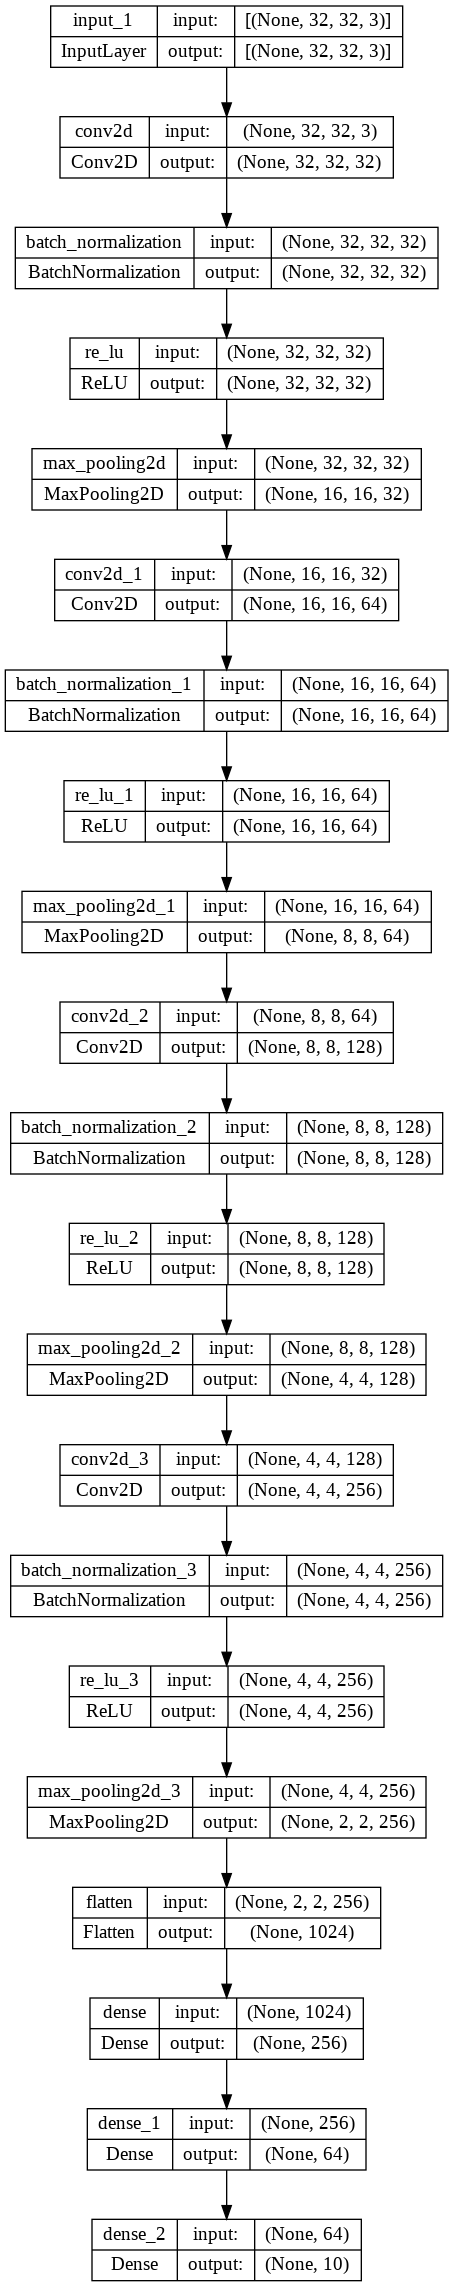

In [ ]:
#For your Verification Purposes:
model_n=tf.keras.models.load_model('PES1UG20CS385.h5') # "SRN.h5"
model_n.summary()

#Verify your model using this i.e ,if the Image generated after this matches the Flow chart Image in PDF file then your output is most likely correct
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)